In [53]:
## Manipulação de dados
import pandas as pd
import numpy as np

## Visualização dados
import matplotlib.pyplot as plt
import seaborn as sns

## Definição da seed aleatória para reprodução dos experimentos
#random_seed = 4627
random_seed = 160

# Lendo o dataset

In [54]:
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('pima-data.csv', names = colunas)

In [55]:
df.head()

preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1

# Descrição dataset

1. Número de gravidez
2. Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose
3. Pressão arterial diastólica (mm Hg)
4. Espessura da dobra cutânea do tríceps (mm)
5. Insulina sérica de 2 horas (mu U/ml)
6. Índice de massa corporal (peso em kg/(altura em m)^2)
7. Função hereditária do diabetes
8. Idade (anos)
9. Variável de classe (0 ou 1): 0 = Saudável, 1 = Diabético

# Estatísticas: Explorando os dados

In [34]:
print("Numero de linhas = {}".format(df.shape[0]))
print("Numero de colunas = {}".format(df.shape[1]))

Numero de linhas = 768
Numero de colunas = 9


In [35]:
for feature in df.columns:
    print("-----------------------------------------------------------------------------------")
    print("Quantidade de registros unicos para a variável = {} - {}".format(feature,len(df[feature].unique())))
    
    ## Printa cada valor unicos caso a feature possua menos de 3 valores unicos
    if (len(df[feature].unique()))<=3:
        
        for valor_unico in df[feature].unique():
            print("Valor único: {}".format(valor_unico))

-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = preg - 17
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = plas - 136
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = pres - 47
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = skin - 51
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = test - 186
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = mass - 248
-----------------------------------------------------------------------------------
Quantidade de registros unicos para a variável = pedi -

In [39]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
df.describe().T

count        mean         std     min       25%       50%        75%  \
preg   768.0    3.845052    3.369578   0.000   1.00000    3.0000    6.00000   
plas   768.0  120.894531   31.972618   0.000  99.00000  117.0000  140.25000   
pres   768.0   69.105469   19.355807   0.000  62.00000   72.0000   80.00000   
skin   768.0   20.536458   15.952218   0.000   0.00000   23.0000   32.00000   
test   768.0   79.799479  115.244002   0.000   0.00000   30.5000  127.25000   
mass   768.0   31.992578    7.884160   0.000  27.30000   32.0000   36.60000   
pedi   768.0    0.471876    0.331329   0.078   0.24375    0.3725    0.62625   
age    768.0   33.240885   11.760232  21.000  24.00000   29.0000   41.00000   
class  768.0    0.348958    0.476951   0.000   0.00000    0.0000    1.00000   

          max  
preg    17.00  
plas   199.00  
pres   122.00  
skin    99.00  
test   846.00  
mass    67.10  
pedi     2.42  
age     81.00  
class    1.00

# Definição de features e target

In [56]:
features = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
var_target = 'class'

# Distribuição  de features

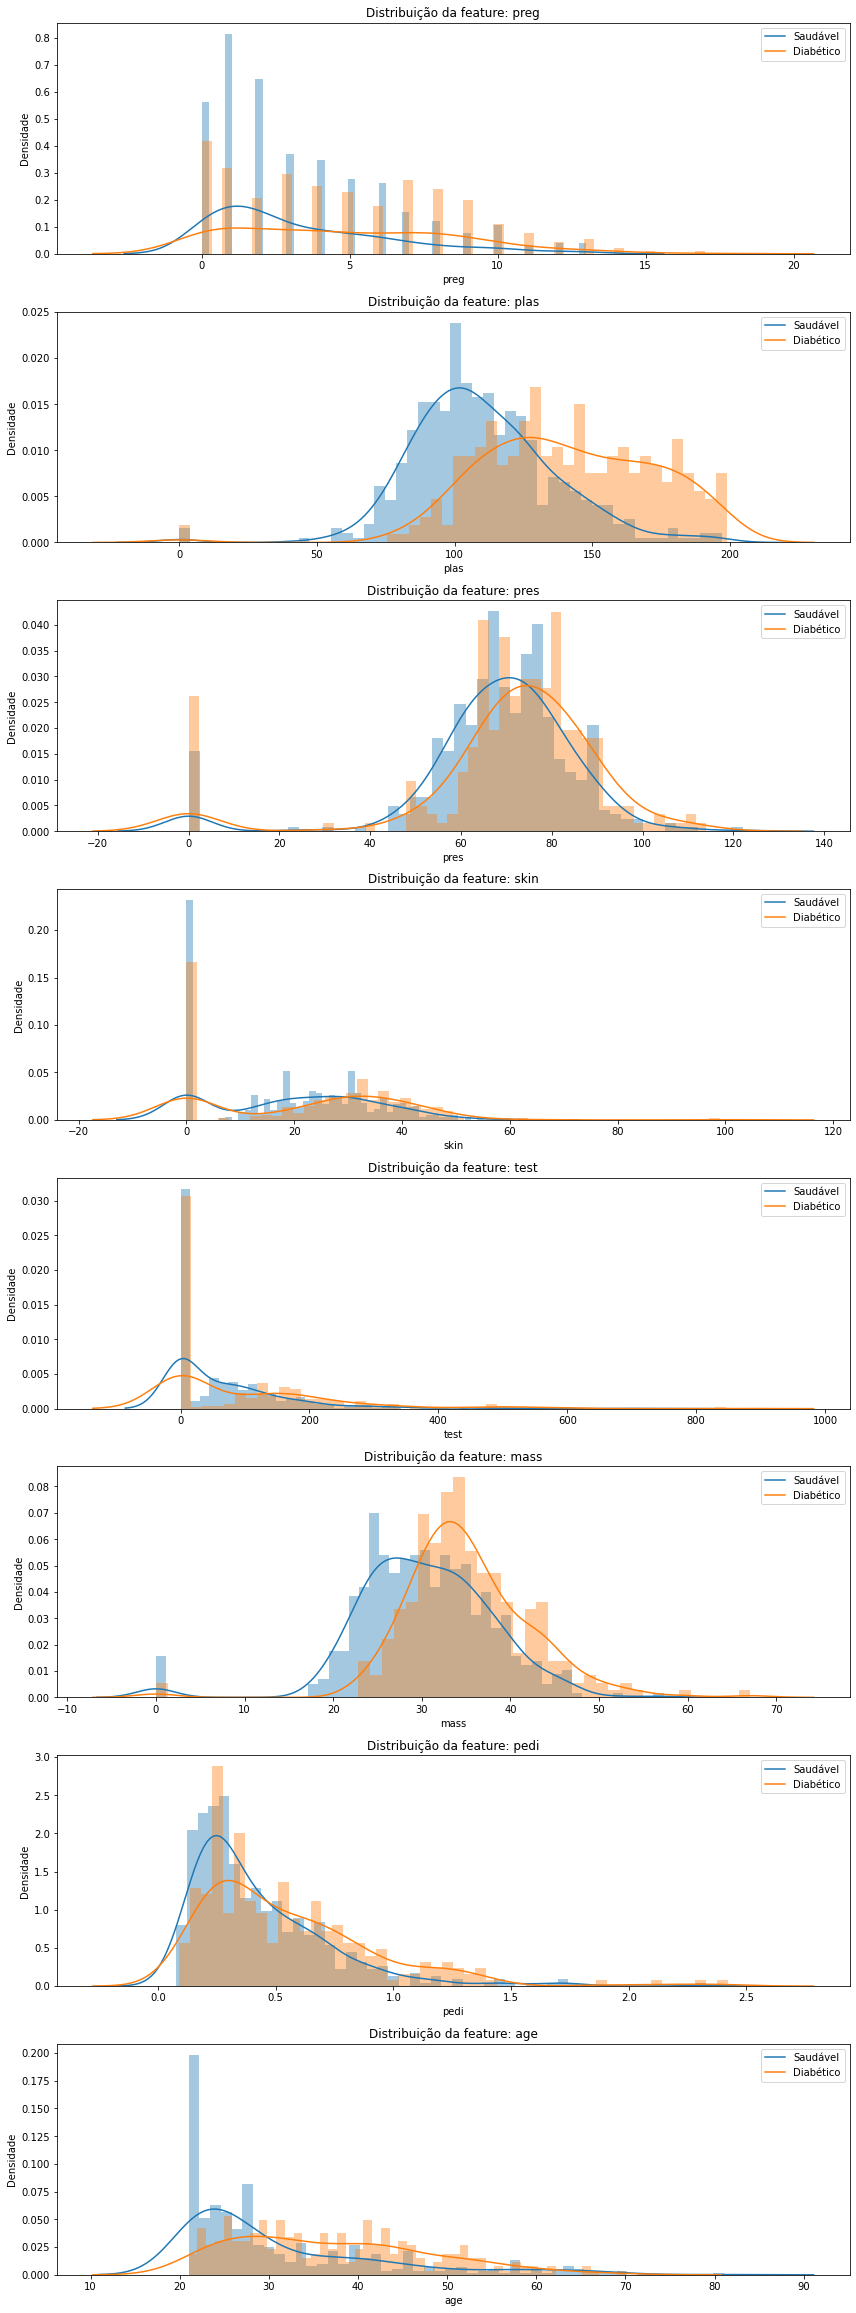

In [57]:
import matplotlib.gridspec as gridspec
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)

## percorre todas as features (exceto a target que é a coluna 9)
for i, cn in enumerate(df.iloc[:,:8]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df[var_target] == 0], bins=50)
    sns.distplot(df[cn][df[var_target] == 1], bins=50)
    
    ## Eixos
    ax.set_xlabel(cn)
    ax.set_ylabel('Densidade')
    
    ## Titulo
    ax.set_title('Distribuição da feature: ' + str(cn))
    
    ## Legenda
    plt.legend(labels=["Saudável","Diabético"])
    
    ## Melhorar visualização
    plt.tight_layout()
    
plt.show()

# Separando treino e teste

In [43]:
X = df.drop(['class'], axis=1)
y = df['class']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=random_seed, stratify=y)

In [47]:
X_test.shape

(85, 8)

- Base de teste composta por 83 exemplos (11% da base)

## Selecionando features

In [48]:
## Selecionando 6 features das 8 disponíveis
features_selecionadas = ['age','mass','pedi','plas','pres','test']

X_train = X_train[features_selecionadas]
y_train = y_train

X_test = X_test[features_selecionadas]
y_test = y_test

## Modelo: RandomForest com PCA

In [49]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# usado class_weights do randomforest em vez das técnicas de balanceamento.
modelo_tunado = RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                        criterion='entropy', max_depth=15,
                                        min_samples_leaf=2, min_samples_split=3,
                                        n_estimators=40, n_jobs=-1,
                                        random_state=random_seed)



model = Pipeline(steps=[('PCA', PCA(n_components=5)),
                ('RandomForestClassifier',modelo_tunado)])

model = modelo_tunado

## Treinando

In [50]:
############### fit treino
model.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=15, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=40, n_jobs=-1, random_state=160)

## Prevendo base de testes e avaliando resultados

In [51]:
#predict teste
p = model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score

############### Métricas ##################

#Calculando o recall
recall_0 = recall_score(y_test, p, pos_label=0)
recall_1 = recall_score(y_test, p, pos_label=1)

#Calculando Precision
precision_0 = precision_score(y_test, p, pos_label = 0)
precision_1 = precision_score(y_test, p, pos_label = 1)

#Calculando acurácia
accuracy = accuracy_score(y_test, p)

#Calculando AUC
auc = roc_auc_score(y_test, p)


print("Classification Report \n",classification_report(y_test, p))
print("Confusion Matrix: \n",confusion_matrix(y_test, p))

print("\n Métricas:")
print("Acurácia = {}".format(accuracy))
print("Area sobre curva ROC = {}".format(auc))
print("Recall_classe_0 = {}".format(recall_0))
print("Recall_classe_1 = {}".format(recall_1))
print("Precisao_classe_0 = {}".format(precision_0))
print("Precisao_classe_1 = {}".format(precision_1))


Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.84      0.88        55
           1       0.75      0.90      0.82        30

    accuracy                           0.86        85
   macro avg       0.84      0.87      0.85        85
weighted avg       0.87      0.86      0.86        85

Confusion Matrix: 
 [[46  9]
 [ 3 27]]

 Métricas:
Acurácia = 0.8588235294117647
Area sobre curva ROC = 0.8681818181818182
Recall_classe_0 = 0.8363636363636363
Recall_classe_1 = 0.9
Precisao_classe_0 = 0.9387755102040817
Precisao_classe_1 = 0.75


In [30]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

acuracia_maxima = 0

for random_seed in range(160,161):
    
    print("iterando seed = {}".format(random_seed))
    
    for i in np.linspace(0.09,0.13,100):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=random_seed, stratify=y)

        ## Selecionando 6 features das 8 disponíveis
        features_selecionadas = ['age','mass','pedi','plas','pres','test']

        X_train = X_train[features_selecionadas]
        y_train = y_train

        X_test = X_test[features_selecionadas]
        y_test = y_test

        # usado class_weights do randomforest em vez das técnicas de balanceamento.
        modelo_tunado = RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                                criterion='entropy', max_depth=20,
                                                min_samples_leaf=2, min_samples_split=3,
                                                n_estimators=100, n_jobs=-1,
                                                random_state=random_seed)

        
        model = modelo_tunado

        ############### fit treino
        model.fit(X_train,y_train)

        #predict teste
        p = model.predict(X_test)

        # metricas
        accuracy = accuracy_score(y_test, p)

        if accuracy >= acuracia_maxima:
            acuracia_maxima = accuracy
            print(accuracy,random_seed,i)

iterando seed = 160
0.8428571428571429 160 0.09
0.8428571428571429 160 0.0904040404040404
0.8428571428571429 160 0.09080808080808081
0.8591549295774648 160 0.0912121212121212
0.8591549295774648 160 0.09161616161616161
0.8591549295774648 160 0.09202020202020202
0.8591549295774648 160 0.09242424242424242
0.875 160 0.09282828282828283
0.875 160 0.09323232323232324
0.875 160 0.09363636363636363
0.8904109589041096 160 0.09404040404040404
0.8904109589041096 160 0.09444444444444444
0.8904109589041096 160 0.09484848484848485
0.9066666666666666 160 0.09646464646464646
0.9066666666666666 160 0.09686868686868687
0.9066666666666666 160 0.09727272727272727
0.9102564102564102 160 0.1005050505050505
0.9102564102564102 160 0.1009090909090909
0.9102564102564102 160 0.10131313131313131
0.9176470588235294 160 0.10939393939393939
0.9176470588235294 160 0.1097979797979798
0.9176470588235294 160 0.1102020202020202
0.9176470588235294 160 0.11060606060606061
